### SAVING AND LOADING THE MODEL

+ We can only save the Sequential or Functional API models.
+ We cannot save the SubClassing API models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
## use keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("===================Shape of the Full Training and Test Set======================")
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

## the dataset is already splitted to training and test set.
## now the data is to be splitted to validation set.
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print("===================Shape of the Training and Test Set after the Splitting to Validation Set======================")
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

## for fashion mnist, the class names are
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
print(class_names)

## first example in the trainning set 
print(y_train[2])
print(class_names[y_train[0]])
print(class_names[y_train[2]])

print("==============Building the Model using Sequntial API=======================")
##defining the model
## this is the line to reate the sequential model
## simplest kind of keras model for neural networks, this is called sequential API.
model = keras.models.Sequential()
## First Layer is Flatten Layer
## This will convert each input image to 1D array.
## here we have to specify the input shape  = (28,28)
## we dont need to give the batch size here. only the input shape.
## alternatively we can give keras.layers.InputLayer(input_shape=[28,28])
model.add(keras.layers.Flatten(input_shape = [28,28]))
## next layer is dense layer with 300 neurons.
## it will use ReLU activation function.
model.add(keras.layers.Dense(300, activation = "relu"))
## next layer is also a Dense layer with 100 neurons
## it also uses the ReLU activation function.
model.add(keras.layers.Dense(100, activation = "relu"))
## next layer is the final layer with 10 neurons. to classify the 10 classes.
## here using the softmax actiavtion function.
model.add(keras.layers.Dense(10, activation = "softmax"))

# ## we can do the same thing in the given below manner as well
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300, activation = "relu"),
#     keras.layers.Dense(100, activation = "relu"),
#     keras.layers.Dense(10, activation = "softmax")
# ])

## printing the model summary
print(model.summary())
## print the model layers
print(model.layers)
## check the first hidden layer
hidden1 = model.layers[1]
print(hidden1.name)
## checking the weights and biases.
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

print("=================Compiling the model=====================")
## compile the model
## compile is to specify the loss fnuction and optimizer to use while training and evaluating.
## also we can give the metrics to use while training and evaluating model.
## using loss = "sparse_categorical_crossentropy"
## using optimizer as "sgd" which is stochcastic gradient descent.
## using the metrics as "accuracy"
model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])

print("================Training the Model=======================")
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

===================Shape of the Full Training and Test Set======================
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
===================Shape of the Training and Test Set after the Splitting to Validation Set======================
(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
7
Coat
Sneaker
==============Building the Model using Sequntial API=======================
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                         

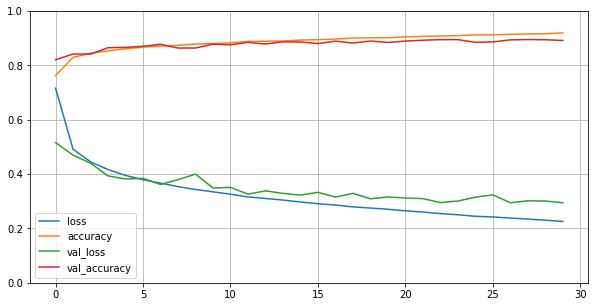

In [4]:
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [5]:
## save the model
model.save("fashion_mnist_classifier_model.h5")

In [6]:
## loading the saved model.
model = keras.models.load_model("fashion_mnist_classifier_model.h5")

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
